# Spam SMS Detection using Machine Learning

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Exploration

In [3]:
print('Shape of the dataset : ',df.shape)
#drop unnamed columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

Shape of the dataset :  (5572, 5)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [6]:
#checking for duplicate value
df.duplicated().sum()

403

In [7]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [8]:
#rename the column
df=df.rename(columns={'v1':'label','v2':'text'})

In [9]:
df.head(1)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."


In [10]:
df.groupby('label').describe().transpose()

label                                                      ham  \
text count                                                4516   
     unique                                               4516   
     top     Go until jurong point, crazy.. Available only ...   
     freq                                                    1   

label                                                     spam  
text count                                                 653  
     unique                                                653  
     top     Free entry in 2 a wkly comp to win FA Cup fina...  
     freq                                                    1

In [11]:
#checking for null values
df.isnull().sum()

label    0
text     0
dtype: int64

# Data Preparation

In [12]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

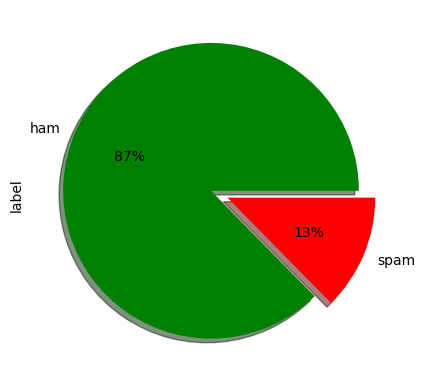

In [13]:
plot_df = df.label.value_counts()
colors = ['green','red']
explode=(0.06,0.06)
plot_df.plot(kind="pie",shadow=True,explode=explode,colors=colors,autopct='%1.0f%%')

In [14]:
#convert categorical value into numerical in label column
df.loc[df['label']=='spam','label']=1
df.loc[df['label']=='ham','label']=0

In [15]:
#For balancing the dataset
from sklearn.utils import resample

df_largeset=df[df['label']==0]
df_smallset=df[df['label']==1]
#resmapling with replacement
df_smallset_upsampled=resample(df_smallset,replace=True,n_samples=4825,random_state=0)
df=pd.concat([df_largeset,df_smallset_upsampled])

In [16]:
df['label'].value_counts()

1    4825
0    4516
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

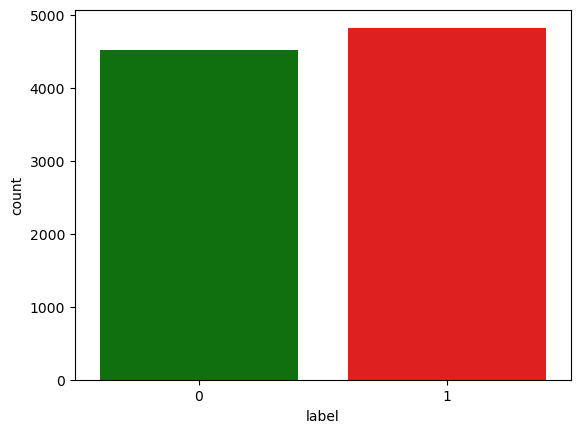

In [17]:
sns.countplot(x='label',data=df,palette=['g','r'])

In [18]:
X=df['text']
y=df['label']
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

# Vectorization

In [20]:
#importing libraries for nlp
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [21]:
vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [22]:
X_train_vect=vect.fit_transform(X_train)
X_test_vect=vect.transform(X_test)

#label column is in object type we need to convert it into integer 
y_train=y_train.astype('int')
y_test=y_test.astype('int')

# Model Building

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
model=MultinomialNB()
model.fit(X_train_vect,y_train)

MultinomialNB()

# Prediction & Accuracy

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
pred=model.predict(X_test_vect)
acc=accuracy_score(y_test,pred)
print('Accuracy: ',acc.round(4)*100,'%')

Accuracy:  97.75 %


(-0.5, 949.5, 399.5, -0.5)

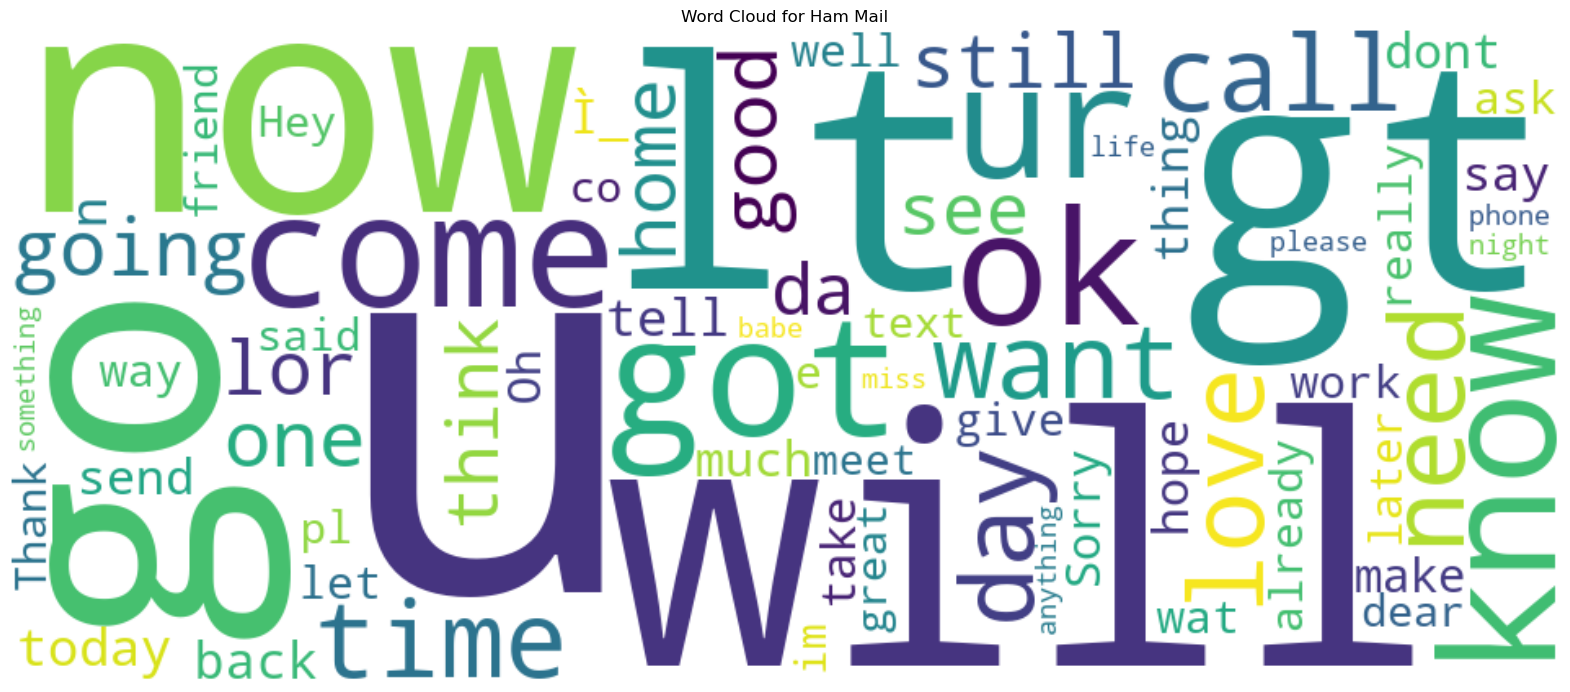

In [29]:
#Visualization of most used words in Ham and Spam mail
from wordcloud import WordCloud
wordcloud1=WordCloud(background_color='white',max_words=70,width=950,height=400).generate(''.join(df_largeset.text))

plt.figure(figsize=(20,10))
plt.title('Word Cloud for Ham Mail')
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')

(-0.5, 949.5, 399.5, -0.5)

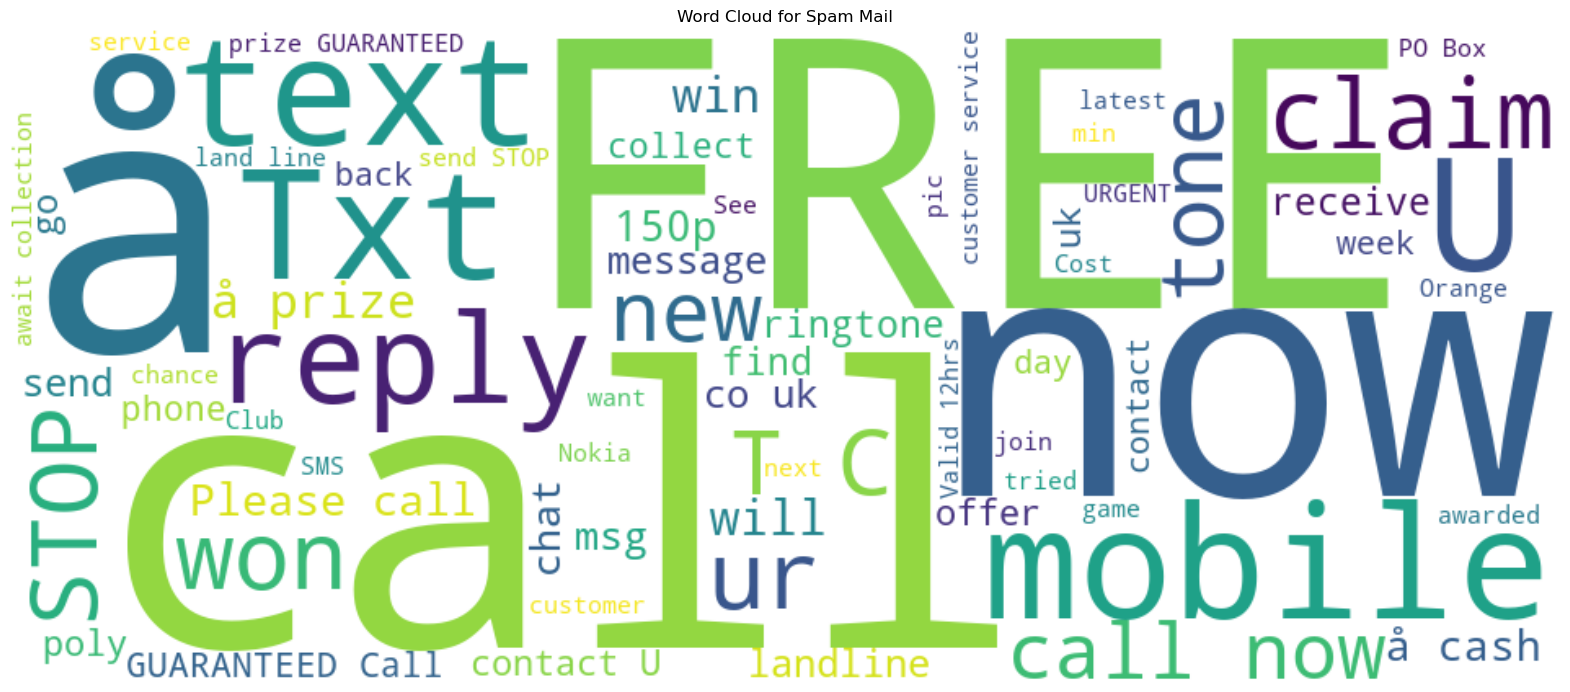

In [30]:
wordcloud2=WordCloud(background_color='white',max_words=70,width=950,height=400).generate(''.join(df_smallset.text))

plt.figure(figsize=(20,10))
plt.title('Word Cloud for Spam Mail')
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')